### **Overview**
This project will explore Algorthmic Trading by using the Moving Average Convergence Divergence strategy in Python. <br>
I have published an entire article on this project on medium: *https*

In [77]:
# importing the packages

## Basic Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
## Data Source
import yfinance as yf

### **Extracting Live Stock Data**
I will be connecting to the Yahoo Finance API, which provide the possibility to get live data with less than a second lag 

In [80]:
# Connecting to the Yahoo Finance API
tesla = yf.download(tickers='TSLA', period = '1y', index_as_date = True, interval='1d')
spy = yf.download(tickers='^GSPC', period='1y', index_as_date = True, interval='1d')
jnj = yf.download(tickers='JNJ', period='1y', index_as_date = True, interval='1d')

tesla.head(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000
2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
2020-06-08,183.800003,190.000000,181.832001,189.983994,189.983994,70873500
2020-06-09,188.001999,190.888000,184.785995,188.134003,188.134003,56941000
2020-06-10,198.376007,205.496002,196.500000,205.009995,205.009995,92817000
2020-06-11,198.039993,203.792007,194.399994,194.567993,194.567993,79582500
2020-06-12,196.000000,197.595993,182.520004,187.056000,187.056000,83817000


### Plotting the Stock Price Charts

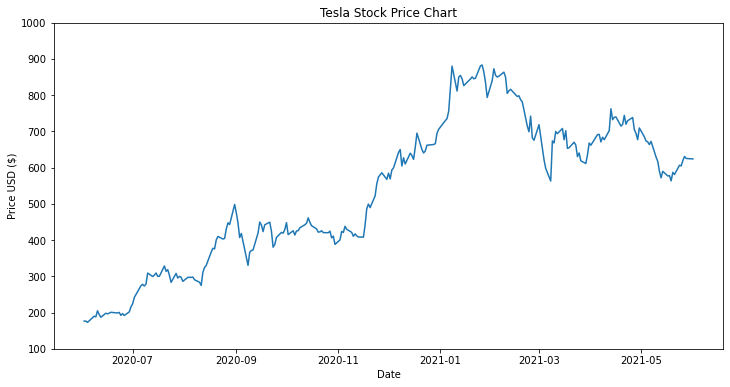

In [108]:
# Visually show the stock plot for Tesla
fig = plt.figure(figsize=(12, 6))
plt.plot(tesla['Close'], label='Close')
plt.title('Tesla Stock Price Chart')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.ylim([100, 1000])
plt.show()

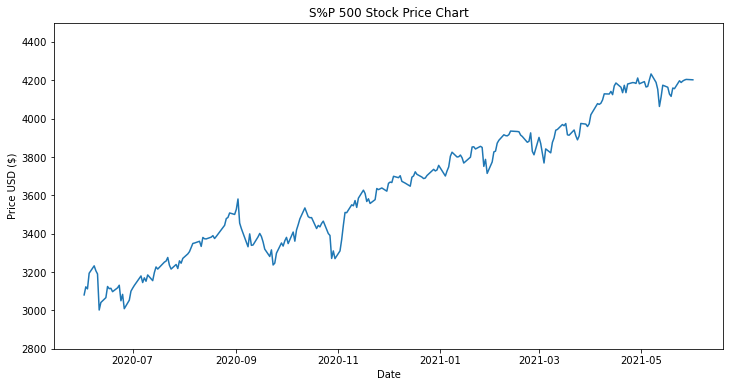

In [109]:
# Visually show the stock plot for S&P500
fig = plt.figure(figsize=(12, 6))
plt.plot(spy['Close'], label='Close')
plt.title('S%P 500 Stock Price Chart')
plt.xlabel('Date')
plt.ylabel('Price USD ($)')
plt.ylim([2800, 4500])
plt.show()

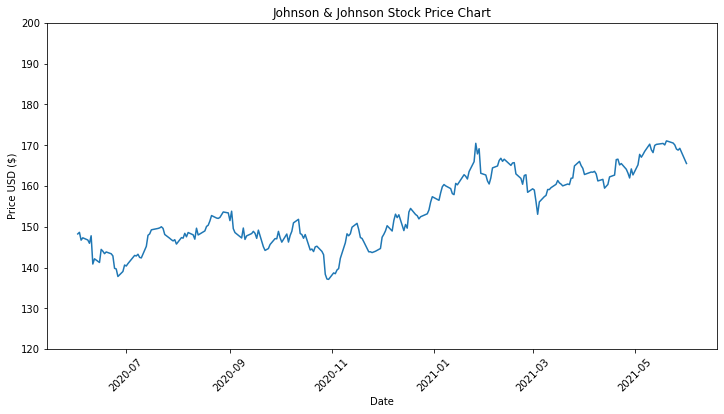

In [110]:
# Visually show the stock plot for Johnson & Johnson
fig = plt.figure(figsize=(12, 6))
plt.plot(Jnj_data['Close'], label='Close')
plt.title('Johnson & Johnson Stock Price Chart')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price USD ($)')
plt.ylim([120, 200])
plt.show()

### Calculating EMAs, MACD & Signal 

In [100]:
# define functions to calculate EMAs, MACD & Signal Line
def calculate_shortEMA(dataframe):
    ShortEMA = dataframe.Close.ewm(span=12, adjust=False).mean()
    return ShortEMA

def calculate_longEMA(dataframe):
    LongEMA = dataframe.Close.ewm(span=26, adjust=False).mean()
    return LongEMA

def calculate_MACD(dataframe):
    MACD = calculate_longEMA(dataframe) - calculate_shortEMA(dataframe)
    return MACD

def calculate_signal(dataframe):
    signal = calculate_MACD(dataframe).ewm(span=9, adjust=False).mean()
    return signal

### Plotting the graphs

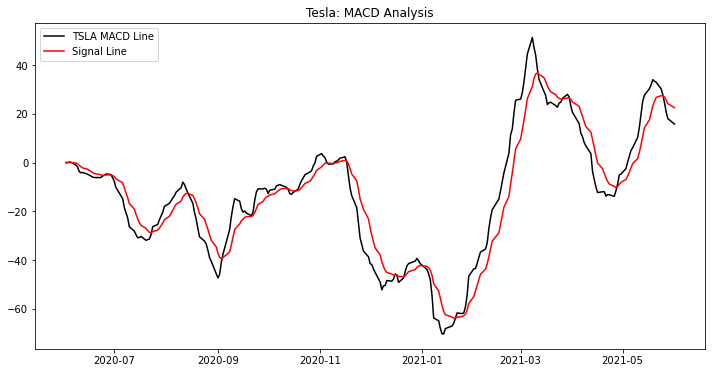

In [115]:
# Plotting the MACD indicator for Tesla
fig = plt.figure(figsize=(12, 6))
plt.plot(tesla.index, calculate_MACD(tesla), label = "TSLA MACD Line", color = 'black')
plt.plot(tesla.index, calculate_signal(tesla), label = 'Signal Line', color = 'red')
plt.legend(loc='upper left')
plt.title("Tesla: MACD Analysis")
plt.show()

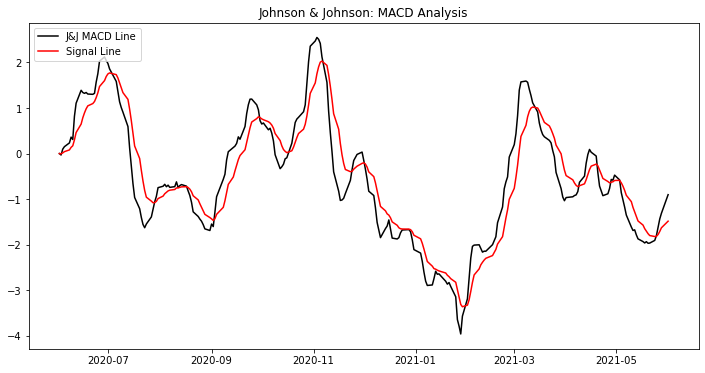

In [114]:
# Plotting the MACD indicator for Johnson & Johnson
fig = plt.figure(figsize=(12, 6))
plt.plot(jnj.index, calculate_MACD(jnj), label = "J&J MACD Line", color = 'black')
plt.plot(jnj.index, calculate_signal(jnj), label = 'Signal Line', color = 'red')
plt.legend(loc='upper left')
plt.title("Johnson & Johnson: MACD Analysis")
plt.show()

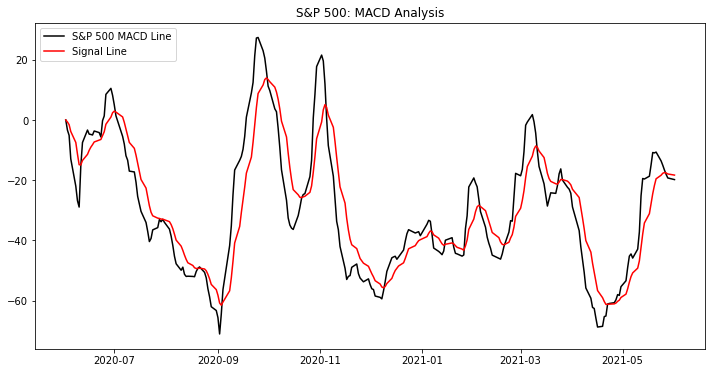

In [113]:
# Plotting the MACD indicator for S&P 500
fig = plt.figure(figsize=(12, 6))
plt.plot(spy.index, calculate_MACD(spy), label = "S&P 500 MACD Line", color = 'black')
plt.plot(spy.index, calculate_signal(spy), label = 'Signal Line', color = 'red')
plt.legend(loc='upper left')
plt.title("S&P 500: MACD Analysis")
plt.show()

*The above chart clearly allows investors to recognize when the MACD line crosses over the signal line and indicate whether they should buy or sell the stock! Ofcourse no strategy is perfect on its own but here we can get an idea on the future trend of this stock.*

### Manipulating DataFrames

In [116]:
# we will now create new columns for our three dataframes

## Tesla
tesla['MACD'] = calculate_MACD(tesla)
tesla['Signal Line'] = calculate_signal(tesla)
## J&J
jnj['MACD'] = calculate_MACD(jnj)
jnj['Signal Line'] = calculate_signal(jnj)
## S&P500
spy['MACD'] = calculate_MACD(spy)
spy['Signal Line'] = calculate_signal(spy)

### Creating a Function to signal when to buy and sell an asset

In [130]:
# Creating a function to signal when to buy and sell an asset
def buy_sell(dataframe):
    Buy = []
    Sell = []
    Flag = -1 
            
    for i in range(0, len(dataframe)):
        # Go through each row to tell if the MACD line crosses the Signal Line
        if dataframe['MACD'][i] > dataframe['Signal Line'][i]:
            Sell.append(np.nan)
            if Flag != 1:
                Buy.append(dataframe['Close'][i])
                Flag = 1 #indicates we have been here
            else:
                Buy.append(np.nan)
                
        elif dataframe['MACD'][i] < dataframe['Signal Line'][i]:
            Buy.append(np.nan)
            if Flag != 0:
                Sell.append(dataframe['Close'][i])
                Flag = 0 #indicates we have been here
            else:
                Sell.append(np.nan)
        else:
            Sell.append(np.nan)
            Buy.append(np.nan)
            
    return (Buy, Sell)

In [124]:
# we will now create new columns for our three dataframes

## Tesla
tesla_signal = buy_sell(tesla)
tesla['Buy_Signal_Price'] = tesla_signal[0]
tesla['Sell_Signal_Price'] = tesla_signal[1]

## JnJ
jnj_signal = buy_sell(jnj)
jnj['Buy_Signal_Price'] = jnj_signal[0]
jnj['Sell_Signal_Price'] = jnj_signal[1]

## S&P 500
spy_signal = buy_sell(spy)
spy['Buy_Signal_Price'] = spy_signal[0]
spy['Sell_Signal_Price'] = spy_signal[1]

### Plot the Final Signal Graphs

In [139]:
# Visually show the Buy and Sell Signals for each of the Stock Chart.
# We can create a function for it

def plot_signals(dataframe):
    fig = plt.figure(figsize=(12, 6))
    plt.scatter(dataframe.index, dataframe['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha = 1)
    plt.scatter(dataframe.index, dataframe['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha = 1)
    plt.plot(dataframe['Close'], label='Close Price', color = 'black', alpha = 0.35)
    plt.title('Closing Price Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.legend(loc = 'upper left')
    plt.show()

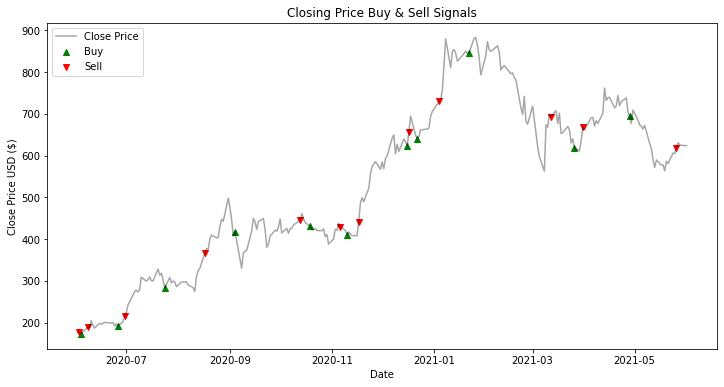

In [136]:
plot_signals(tesla)

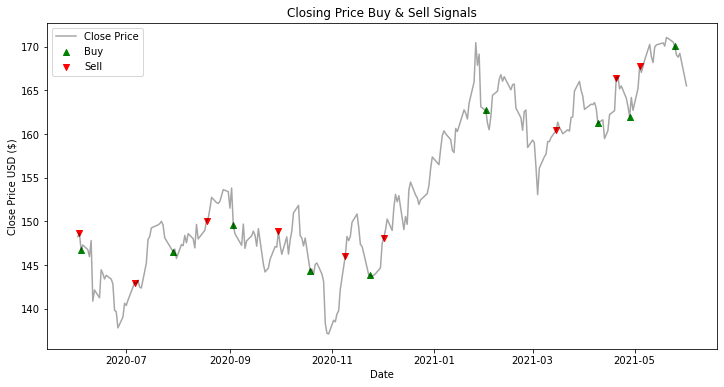

In [137]:
plot_signals(jnj)

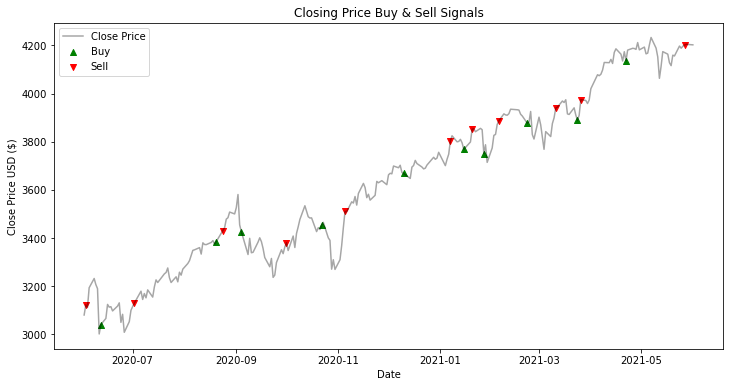

In [138]:
plot_signals(spy)

### Backtesting
*Backtesting is a very popular term used in Statistical Analysis which refers to testing a predictive model on historical data.*

In [169]:
# constructing a Backtesting function

def backtesting(dataframe):
    # We will first need to extract out the index of each Buy & Sell price 
    # This is needed to get the 'Opening Price' of the next day - when the actual trade takes place
    Buy = []
    Sell = []
    
    for i in range(len(dataframe['Buy_Signal_Price'])):
               if not np.isnan(dataframe['Buy_Signal_Price'][i]):
                   Buy.append(i)
                    
    for i in range(len(dataframe['Sell_Signal_Price'])):
               if not np.isnan(dataframe['Sell_Signal_Price'][i]):
                   Sell.append(i)
                                
    Realbuys = [i+1 for i in Buy] 
    Realsells = [i+1 for i in Sell]
    
    # We extract out the opening price for the day after the respective signals
    Buyprices = dataframe.Open.iloc[Realbuys]
    Sellprices = dataframe.Open.iloc[Realsells]
    
    # We will be dropping the signals if the selling signal is preceeded with no buying signal
    # Also applies for the signals if the buying signal is followed with no selling signal
    if Sellprices.index[0] < Buyprices.index[0]:
        Sellprices = Sellprices.drop(Sellprices.index[0])
    elif Buyprices.index[-1] > Sellprices.index[-1]:
        Buyprices = Buyprices.drop(Buyprices.index[-1])
        
    # we would now be calculating relative profits 
    relative_profits = []
    for i in range(len(Sellprices)):
        relative_profits.append((Sellprices[i] - Buyprices[i])/Buyprices[i])
        return sum(relative_profits)/len(relative_profits) * 100

### Calculating Net Average Annualized Returns 

In [185]:
print("The Algorithm was able to generate a {}% profit over the past year for Tesla"
      .format(round(backtesting(tesla), 2)))

print("The Algorithm was able to generate a {}% profit over the past year for Johnson & Johnson"
      .format(round(backtesting(jnj), 2)))

print("The Algorithm was able to generate a {}% profit over the past year for S&P 500"
      .format(round(backtesting(spy), 2)))

The Algorithm was able to generate a 7.08% profit over the past year for Tesla
The Algorithm was able to generate a -4.27% profit over the past year for Johnson & Johnson
The Algorithm was able to generate a 5.4% profit over the past year for S&P 500
